In [1]:
# Import Library

import torchmetrics
import pandas as pd
import tensorflow as tf
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

In [2]:
# Import Data and Pre-Processing
df = pd.read_csv("diabetes.csv")
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,negative
764,2,122,70,27,0,36.8,27,negative
765,5,121,72,23,112,26.2,30,negative
766,1,126,60,0,0,30.1,47,positive


In [3]:
## Benerin kolom "Class"
df["Class"].unique()

array(['positive', 'negative'], dtype=object)

In [4]:
map_class = {
    "positive": 1,
    "negative": 0
}

df["Class"] = df["Class"].map(lambda x: map_class[x])

In [5]:
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X.shape

(768, 7)

In [7]:
# Modelling
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(7,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1),
])
model(X[:1].values)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[5.9608703]], dtype=float32)>

In [8]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-3
)

model.compile(
    loss=bce,
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [9]:
history = model.fit(
    X_train.values, 
    y_train.values, 
    epochs=30, 
    batch_size=32,
    validation_data=(
        X_test.values,
        y_test.values
    )
)

Epoch 1/30
17/17 [==============================] - 1s 11ms/step - loss: 1.5904 - accuracy: 0.5253 - val_loss: 0.9607 - val_accuracy: 0.6693
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 1.0616 - accuracy: 0.6401 - val_loss: 0.7907 - val_accuracy: 0.5984
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 1.0065 - accuracy: 0.6459 - val_loss: 0.9642 - val_accuracy: 0.6102
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.7514 - accuracy: 0.6498 - val_loss: 0.6677 - val_accuracy: 0.6614
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6868 - val_loss: 0.6423 - val_accuracy: 0.7087
Epoch 6/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6926 - val_loss: 0.8023 - val_accuracy: 0.6732
Epoch 7/30
17/17 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.6790 - val_loss: 0.7401 - val_accuracy: 0.6614
Epoch 8/30
17/17 [=

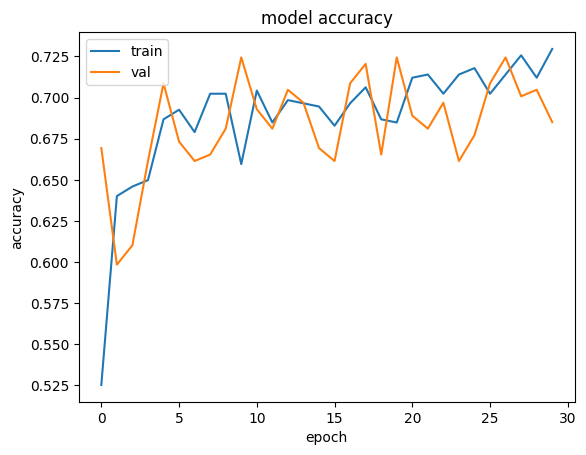

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

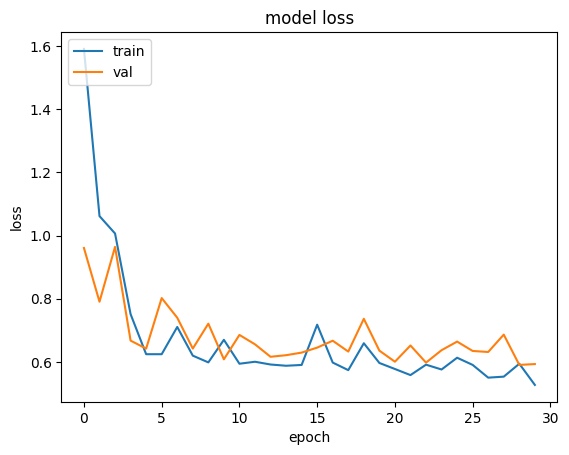

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
# PYTORCH START HERE

In [29]:
model_pt = nn.Sequential(
    nn.Linear(7, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16,1),
)

model_pt(torch.tensor(X[:1].values, dtype=torch.float32))

tensor([[2.4494]], grad_fn=<AddmmBackward0>)

In [30]:
optim = torch.optim.Adam(model_pt.parameters(), lr=1e-3)

m = nn.Sigmoid()
flat = nn.Flatten(start_dim=0)
loss = nn.BCELoss()

accuracy = torchmetrics.Accuracy(task="binary")

In [31]:
dataset = torch.utils.data.TensorDataset(
    torch.tensor(X_train.values, dtype=torch.float32), 
    torch.tensor(y_train.values, dtype=torch.float32)
)

dataset_test = torch.utils.data.TensorDataset(
    torch.tensor(X_test.values, dtype=torch.float32), 
    torch.tensor(y_test.values, dtype=torch.float32)
)


loader_train = torch.utils.data.DataLoader(dataset, batch_size=32)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=32)

In [32]:
epoch = 30

history = {
    "loss_train": [],
    "acc_train": [],
    "loss_test":[],
    "acc_test":[]
}

for i in range(epoch):
    print(f"Epoch: {i + 1}")
    
    # Train
    model_pt.train()
    loss_history_batch = []
    accuracy_history_batch = []
    for x, y in loader_train:
        optim.zero_grad()
        logits = model_pt(x)
        loss_val = loss(flat(m(logits)), y)
        loss_val.backward()
        optim.step()
        
        # Logging
        loss_item = loss_val.detach().item()
        loss_history_batch.append(loss_item)
        
        acc_item = accuracy(logits.reshape(-1), y).detach().item()
        accuracy_history_batch.append(acc_item)
    print("loss_train",np.average(np.array(loss_history_batch)))
    print("acc_train",np.average(np.array(accuracy_history_batch)))
    history["loss_train"].append(np.average(np.array(loss_history_batch)))
    history["acc_train"].append(np.average(np.array(accuracy_history_batch)))
        
    
    # Test
    model_pt.eval()
    loss_history_batch = []
    accuracy_history_batch = []
    with torch.no_grad():
        for x, y in loader_test:
            logits = model_pt(x)
            loss_val = loss(flat(m(logits)), y)
            
            # Logging
            loss_item = loss_val.detach().item()
            loss_history_batch.append(loss_item)
            
            acc_item = accuracy(logits.reshape(-1), y).detach().item()
            accuracy_history_batch.append(acc_item)
            
    print("loss_test",np.average(np.array(loss_history_batch)))
    print("acc_test",np.average(np.array(accuracy_history_batch)))
    history["loss_test"].append(np.average(np.array(loss_history_batch)))
    history["acc_test"].append(np.average(np.array(accuracy_history_batch)))
    

Epoch: 1
loss_train 0.7604705480968251
acc_train 0.5753676470588235
loss_test 0.6524028703570366
acc_test 0.6375000029802322
Epoch: 2
loss_train 0.6282562052502352
acc_train 0.6580882352941176
loss_test 0.6281062513589859
acc_test 0.6736979186534882
Epoch: 3
loss_train 0.6018420282532188
acc_train 0.6966911764705882
loss_test 0.6105195060372353
acc_test 0.6692708358168602
Epoch: 4
loss_train 0.5871317246380974
acc_train 0.6783088235294118
loss_test 0.6172984018921852
acc_test 0.6893229186534882
Epoch: 5
loss_train 0.585747934439603
acc_train 0.6966911764705882
loss_test 0.6183296889066696
acc_test 0.6893229186534882
Epoch: 6
loss_train 0.5743657490786385
acc_train 0.7058823529411765
loss_test 0.6200241521000862
acc_test 0.6854166686534882
Epoch: 7
loss_train 0.565571888404734
acc_train 0.7132352941176471
loss_test 0.6151823922991753
acc_test 0.7013020813465118
Epoch: 8
loss_train 0.5604720290969399
acc_train 0.7205882352941176
loss_test 0.6134929731488228
acc_test 0.6973958313465118
Ep

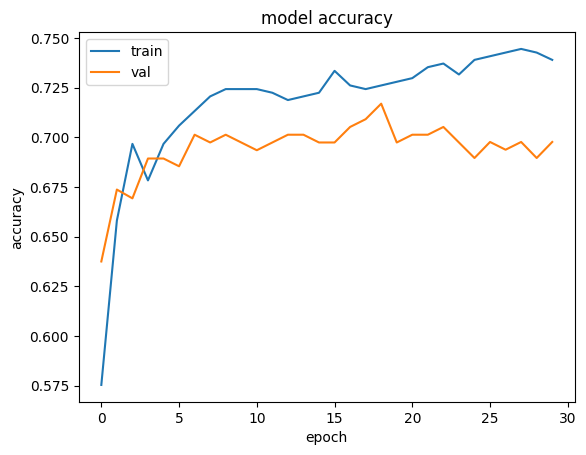

In [33]:
from matplotlib import pyplot as plt
plt.plot(history['acc_train'])
plt.plot(history['acc_test'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

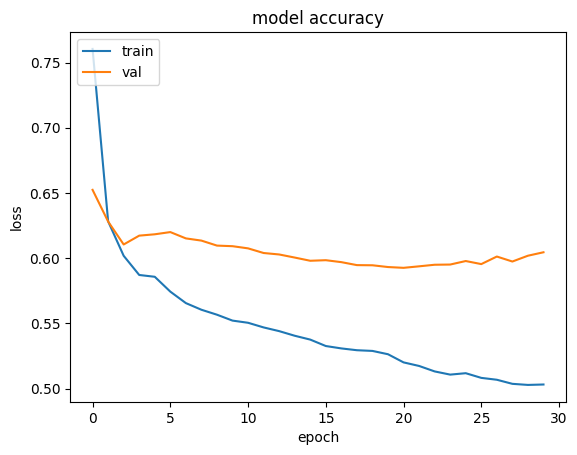

In [34]:
from matplotlib import pyplot as plt
plt.plot(history['loss_train'])
plt.plot(history['loss_test'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
# WITH PYTORCH LIGHTNING HERE!

In [20]:
import lightning.pytorch as pl

In [46]:
# define the LightningModule
class LitAutoEncoder(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.classifer = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,1),
        )
        
        self.accuracy = torchmetrics.Accuracy(task="binary")

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        x, y = batch
        logits = model_pt(x)
        loss_val = F.binary_cross_entropy_with_logits(logits.reshape(-1), y)
        self.log("train_loss", loss_val, prog_bar=True)
        
        accuracy = self.accuracy(logits.reshape(-1), y)
        self.log("train_acc", accuracy, prog_bar=True)
        return loss_val

    def validation_step(self, batch, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        x, y = batch
        logits = model_pt(x)
        loss_val = F.binary_cross_entropy_with_logits(logits.reshape(-1), y)
        self.log("val_loss", loss_val, prog_bar=True)
        
        accuracy = self.accuracy(logits.reshape(-1), y)
        self.log("val_acc", accuracy, prog_bar=True)
        
    def on_train_epoch_end(self):
        # log epoch metric
        self.log('train_acc_epoch', self.accuracy, prog_bar=True)

    def configure_optimizers(self):
        optim = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optim

In [47]:
trainer = pl.Trainer(max_epochs=30)
trainer.fit(model=LitAutoEncoder(), train_dataloaders=loader_train, val_dataloaders=loader_test)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type           | Params
---------------------------------------------
0 | classifer | Sequential     | 3.1 K 
1 | accuracy  | BinaryAccuracy | 0     
---------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.013     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
